<a href="https://colab.research.google.com/github/siddhi1991/GIS-programming/blob/main/book/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_04.ipynb)

This lab will help you solidify your understanding of working with `NumPy`, `Pandas`, and `GeoPandas` for geospatial data analysis. Through these exercises, you will perform data manipulation, spatial analysis, and visualizations by combining these powerful libraries.

## Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [2]:
import numpy as np
array_2D = np.array([[35.6895, 139.6917], [40.7128, -74.0060], [51.5074, -0.1278], [48.8566, 2.3522]])
array_2D

np.radians(array_2D)

# Define the Haversine formula using NumPy
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance


# Create a new DataFrame with city_pairs
import pandas as pd
city_pairs = pd.DataFrame(
    {
        "City1": ["Tokyo", "Tokyo", "Tokyo"],
        "City2": ["New York", "London", "Paris"],
        "Lat1": [35.6895, 35.6895, 35.6895],
        "Lon1": [139.6917, 139.6917, 139.6917],
        "Lat2": [40.7128, 51.5074, 48.8566],
        "Lon2": [-74.0060, -0.1278, 2.3522],
    }
)
city_pairs

city_pairs["Distance_km"] = haversine_np(
    city_pairs["Lat1"], city_pairs["Lon1"], city_pairs["Lat2"], city_pairs["Lon2"]
)
city_pairs

,City1,City2,Lat1,Lon1,Lat2,Lon2,Distance_km
0,Tokyo,New York,35.6895,139.6917,40.7128,-74.0060,10848.807998
1,Tokyo,London,35.6895,139.6917,51.5074,-0.1278,9558.713695
2,Tokyo,Paris,35.6895,139.6917,48.8566,2.3522,9712.071149


## Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [24]:
import pandas as pd

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)

print(f"First five rows:\n {df.head()}")

print(f"The missing vales are:\n {df.isnull().sum()}")

filtered_cities = df[df['population'] > 1_000_000]
print(f"Cities with a population greater than 1 million are:\n {filtered_cities}")

group_countries = filtered_cities.groupby('country')
print(f"Total population by country:\n {group_countries['population'].sum()}")

sort_countries = filtered_cities.sort_values(by='population', ascending=False)
print(f"Top 10 cities by population:\n {sort_countries.head(10)}")



First five rows:
    id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062
The missing vales are:
 id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64
Cities with a population greater than 1 million are:
         id            name country  latitude  longitude  population
97      98           Turin     ITA  45.07039    7.66996     1652000
103    104           Lille     FRA  50.64997    3.08001     1044000
123    124  San Bernardino     USA  34.12038 -117.30003     1745000
124    125      Bridgeport     USA  41.17998  -73.19996     1018000
126    127      Manchester     GBR  53.50042   -2.24799     2230000
...    ...             ... 

## Exercise 3: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

Average building height:
 15.454691136974038
Buildings with a height greater than the average height:
        fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
1        4      23.62      46.18       34.90   3287.84      36  New York   
2        5      19.98     109.60       64.79   2011.21      36  New York   
3        9      18.50      18.18       18.34   3110.32      36  New York   
4       34      21.53      32.84       27.18   5240.89      36  New York   
5       38      18.84        NaN       18.84   1151.88      36  New York   
...    ...        ...        ...         ...       ...     ...       ...   
1196  9714      19.90      19.15       19.52   1230.57      36  New York   
1198  9752      19.35        NaN       19.35   4080.25      36  New York   
1199  9754      24.11      47.47       35.79   7137.13      36  New York   
1200  9756      16.20      15.17       15.68    166.41      36  New York   
1201  9764      26.54      22.30       24.42    696.24      3

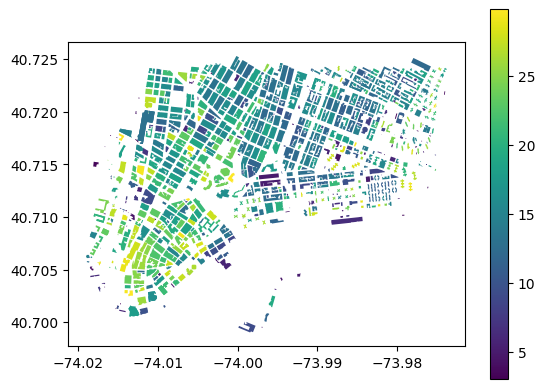

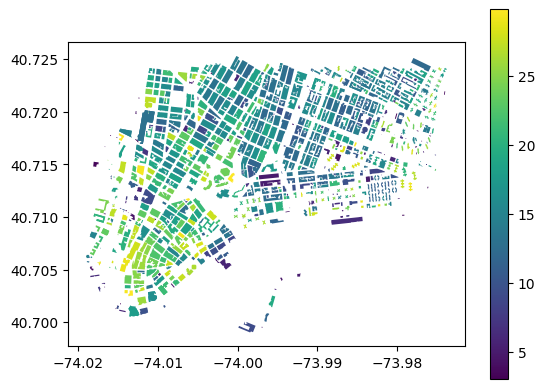

In [33]:
import geopandas as gpd
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)
gdf

import matplotlib.pyplot as plt
gdf.plot(column='height_MS', legend=True)

import plotly.express as px
gdf.plot(column='height_MS', legend=True)

print(f"Average building height:\n {gdf['height_MS'].mean()}")

filtered_height = gdf[gdf['height_MS'] > gdf['height_MS'].mean()]
print(f"Buildings with a height greater than the average height:\n {filtered_height}")

filtered_height.to_file('filtered_height.geojson', driver='GeoJSON')


## Exercise 4: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)
df

filtered_cities = df[(df['latitude'] >= -40) & (df['latitude'] <= 60)]
print(f"Dataset between Latitutdes:\n {filtered_cities}")

from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(filtered_cities.longitude, filtered_cities.latitude)]
gdf = gpd.GeoDataFrame(filtered_cities, geometry=geometry)
gdf

filtered_df = df[(df['latitude'] > -40) & (df['latitude'] < 60)]  # Define filtered_df

# Use filtered_df for further processing
geometry = [Point(xy) for xy in zip(filtered_df['longitude'], filtered_df['latitude'])]
gdf = gpd.GeoDataFrame(filtered_df, geometry=geometry, crs="EPSG:4326")  # Set CRS to WGS 84




Dataset between Latitutdes:
         id            name country  latitude  longitude  population
0        1           Bombo     UGA   0.58330   32.53330       75000
1        2     Fort Portal     UGA   0.67100   30.27500       42670
2        3         Potenza     ITA  40.64200   15.79900       69060
3        4      Campobasso     ITA  41.56300   14.65600       50762
4        5           Aosta     ITA  45.73700    7.31500       34062
...    ...             ...     ...       ...        ...         ...
1244  1245  Rio de Janeiro     BRA -22.92502  -43.22502    11748000
1245  1246       Sao Paulo     BRA -23.55868  -46.62502    18845000
1246  1247          Sydney     AUS -33.92001  151.18518     4630000
1247  1248       Singapore     SGP   1.29303  103.85582     5183700
1248  1249       Hong Kong     CHN  22.30498  114.18501     7206000

[1132 rows x 6 columns]


<ipython-input-55-af27709fac9e>:2: UserWarning:

Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

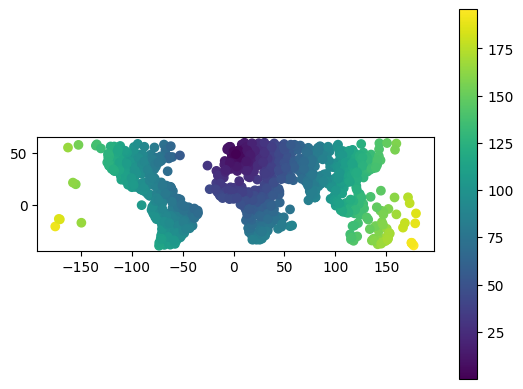

In [55]:
paris_coords = (2.3522, 48.8566)
distance_from_paris = gdf.distance(Point(paris_coords))
gdf['distance_from_paris'] = distance_from_paris
gdf

gdf.plot(column='distance_from_paris', legend=True, cmap='viridis')

